In [11]:
%load_ext autoreload
%autoreload 2
import pickle
import pandas as pd
%matplotlib inline
from matplotlib.ticker import FuncFormatter 
import matplotlib
import matplotlib.pyplot as plt
import glob
from pdb import set_trace

def ts_plotter(self, ax, data1, data2):
    '''
    Helper for plotting panels in time series plot.
    '''

    out = ax.plot(data1, data2, linewidth=2)
    return out   

df = pd.DataFrame() 
df_r = pd.DataFrame() 
df_dqn = pd.DataFrame()
df_dqn_lr00025_y99 = pd.DataFrame()
df_sc = pd.DataFrame()
stats = pd.DataFrame() #for stats

files = glob.glob("../data/random/*.pkl") #random files
for file in files:
    df_r[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )

# files = glob.glob("../data/dqn_vanilla/*.pkl") #vanilla dqn
# for file in files:
#     df_dqn[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )
        
# files = glob.glob("../data/dqn_lr00025/*.pkl") #dqn, lr00025
# for file in files:
#     df_dqn_lr00025[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )

files = glob.glob("../data/dqn_lr00025_y99/*.pkl") #dqn, lr00025, y = 0.999
for file in files:
    df_dqn_lr00025_y99[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )
    
files = glob.glob("../data/self_class/*.pkl") #self class
for file in files:
     df_sc[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )

#files = glob.glob("../data/humans/*.pkl") #humans
#for file in files:
#     df_hum[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Index(['self_class_9', 'self_class_8', 'self_class_10', 'self_class_1',
       'self_class_3', 'self_class_2', 'self_class_6', 'self_class_7',
       'self_class_5', 'self_class_4'],
      dtype='object')

In [8]:
# stats: random
stats['r_m'] = df_r.mean(axis=1)
stats['r_se'] = df_r.sem(axis=1)

# # stats: dqn
# stats['dqn_m'] = df_dqn.mean(axis=1)
# stats['dqn_se'] = df_dqn.sem(axis=1)

# # stats: dqn, lr 0.00025
# stats['dqn_lr00025_m'] = df_dqn_lr00025.mean(axis=1)
# stats['dqn_lr00025_se'] = df_dqn_lr00025.sem(axis=1)

# stats: dqn, lr 0.00025, y = 0.99
stats['dqn_lr00025_y99_m'] = df_dqn_lr00025_y99.mean(axis=1)
stats['dqn_lr00025_y99_se'] = df_dqn_lr00025_y99.sem(axis=1)

# stats: self class
stats['sc_m'] = df_sc.mean(axis=1)
stats['sc_se'] = df_sc.sem(axis=1)

## stats: humans
#stats['hum_m'] = df_hum.mean(axis=1)
#stats['hum_se'] = df_hum.sem(axis=1)

In [9]:
len(stats)
x = [i for i in range(0,98)]
len(x)

98

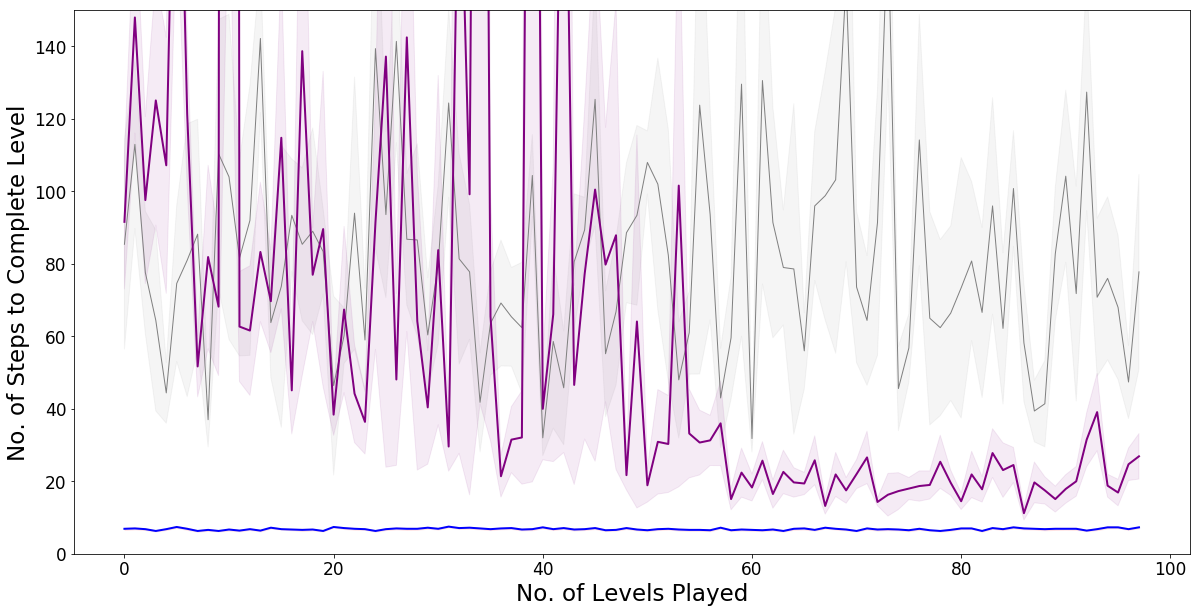

In [10]:
#plt.figure(); df_dqn.plot(subplots=True, figsize=(6, 20), ylim=(0,300)); plt.legend(loc='best')
#df_dqn_m.plot(figsize=(10, 5), ylim=(0,300)); plt.legend(loc='best')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0, 150])
ax.xaxis.label.set_size(23)
ax.yaxis.label.set_size(23)
ax.tick_params(axis='both', which='major', labelsize=17)
ax.set(xlabel="No. of Levels Played", ylabel="No. of Steps to Complete Level")

#random
ax.plot(stats.r_m, color='gray', linewidth=1)
ax.fill_between(x, stats.r_m - stats.r_se, stats.r_m + stats.r_se, alpha=0.08, color='gray')

#dqn, lr 0.00025, y = 0.99
ax.plot(stats.dqn_lr00025_y99_m, color='purple', linewidth=2)
ax.fill_between(x, stats.dqn_lr00025_y99_m - stats.dqn_lr00025_y99_se, stats.dqn_lr00025_y99_m + stats.dqn_lr00025_y99_se, alpha=0.08, color='purple')

#self class
ax.plot(stats.sc_m, color='blue', linewidth=2, label='st')
ax.fill_between(x, stats.sc_m - stats.sc_se, stats.sc_m + stats.sc_se, alpha=0.08, color='red')

#dqn
#ax.plot(stats.dqn_m)
#ax.fill_between(x, stats.dqn_m - stats.r_se, stats.r_m + stats.r_se, alpha=0.15)

#dqn vanilla
#ax.plot(stats.dqn_lr00025_m, color='green', linewidth=2)
#ax.fill_between(x, stats.dqn_lr00025_m - stats.dqn_lr00025_se, stats.dqn_lr00025_m + stats.dqn_lr00025_se, alpha=0.08, color='green')

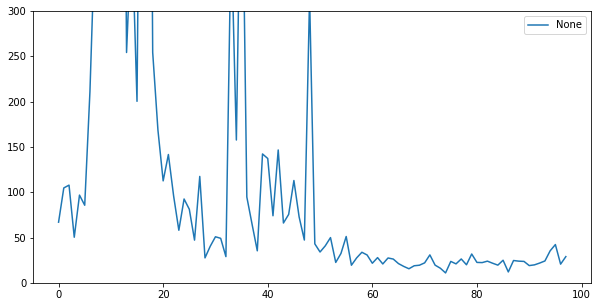

In [167]:
plt.figure(); df_dqn_lr00025_m.plot(figsize=(10, 5), ylim=(0,300)); plt.legend(loc='best')

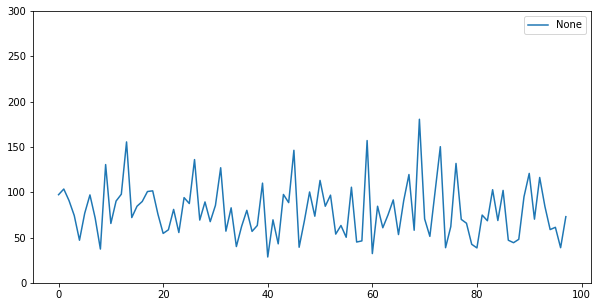

In [165]:
plt.figure(); df_r_mean.plot(figsize=(10, 5), ylim=(0,300)); plt.legend(loc='best')

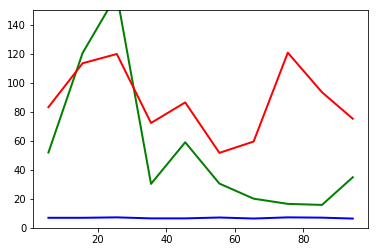

In [94]:
plt.ylim(0,150)
plt.plot('x', 'dqn', data=df, marker='', color='green', linewidth=2)
plt.plot('x', 'rand', data=df, marker='', color='red', linewidth=2)
#plt.plot('x', 'human', data=df, marker='', color='blue', linewidth=2)
plt.plot('x', 'self', data=df, marker='', color='blue', linewidth=2)

plt.show()